In [28]:
import sys

# need to add cocpit dir to path - can't relative import with sister directory
sys.path.insert(0, "..")

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import cocpit

sns.set_style("whitegrid")

%load_ext autoreload
%autoreload 2

plt_params = {
    "axes.labelsize": "xx-large",
    "axes.titlesize": "xx-large",
    "xtick.labelsize": "xx-large",
    "ytick.labelsize": "xx-large",
    "legend.title_fontsize": 12,
}
plt.rcParams["font.family"] = "serif"
plt.rcParams.update(plt_params)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### classification reports

A macro-average will compute the metric independently for each class and then take the average (hence treating all classes equally), whereas a micro-average will aggregate the contributions of all classes to compute the average metric. In a multi-class classification setup, macro-average is preferable if you suspect there might be class imbalance (i.e you may have many more examples of one class than of other classes).

In [2]:
# rename models for plotting
model_names = [
    "efficient",
    "resnet18",
    "resnet34",
    "resnet152",
    "alexnet",
    "vgg16",
    "vgg19",
    "densenet169",
    "densenet201",
]
new_names = [
    "Efficient-b0",
    "ResNet-18",
    "ResNet-34",
    "ResNet-152",
    "AlexNet",
    "VGG-16",
    "VGG-19",
    "DenseNet-169",
    "DenseNet-201",
]
convert_names = {model_names[i]: new_names[i] for i in range(len(new_names))}
convert_names

{'efficient': 'Efficient-b0',
 'resnet18': 'ResNet-18',
 'resnet34': 'ResNet-34',
 'resnet152': 'ResNet-152',
 'alexnet': 'AlexNet',
 'vgg16': 'VGG-16',
 'vgg19': 'VGG-19',
 'densenet169': 'DenseNet-169',
 'densenet201': 'DenseNet-201'}

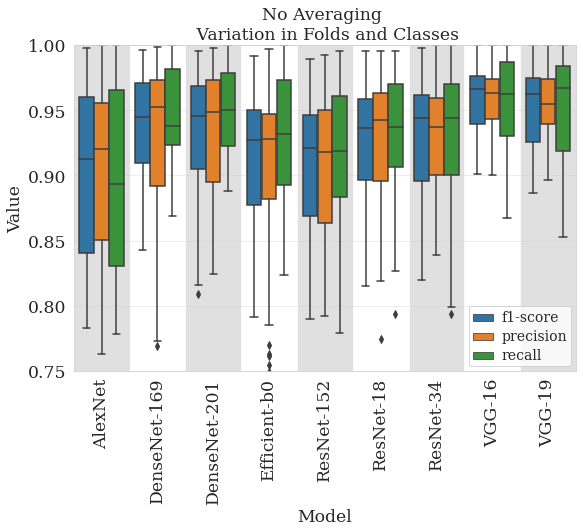

In [60]:
"""
classification report w.r.t. each model 
includes variability between classes and folds
"""
metric_filename = (
    "/data/data/saved_accuracies/v1.0.0/save_val_metrics_e20_bs64_k5_9_no_blank.csv"
)
save_name = "/data/data/plots/model_metrics_noavg.pdf"
cocpit.plotting_scripts.plot_metrics.model_metric_folds(
    metric_filename, convert_names, save_name, avg=None, save_fig=True
)

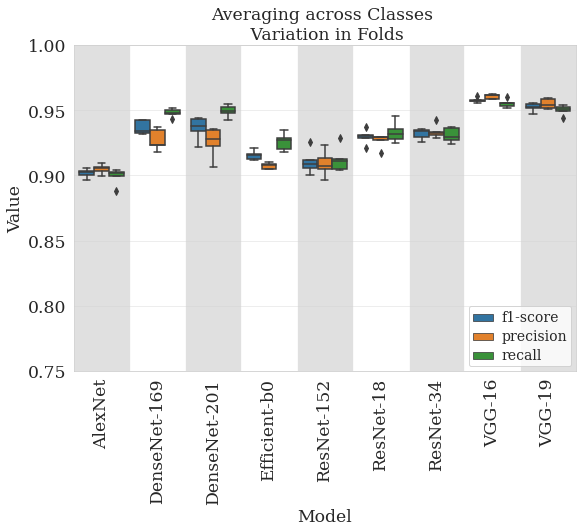

In [61]:
"""
classification report w.r.t. each model 
includes variability only between folds
plots the macro avg across classes
"""
metric_filename = (
    "/data/data/saved_accuracies/v1.0.0/save_val_metrics_e20_bs64_k5_9_no_blank.csv"
)
save_name = "/data/data/plots/model_metrics_variation_folds.pdf"
cocpit.plotting_scripts.plot_metrics.model_metric_folds(
    metric_filename, convert_names, save_name, avg="classes", save_fig=True
)

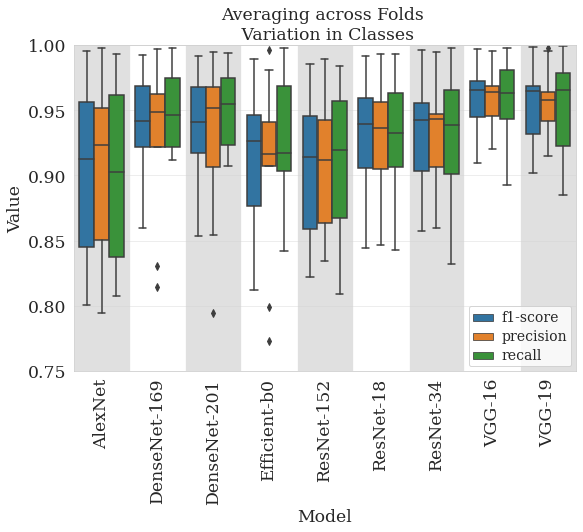

In [62]:
"""
classification report w.r.t. each model 
includes variability only between folds
plots the macro avg across classes
"""
metric_filename = (
    "/data/data/saved_accuracies/v1.0.0/save_val_metrics_e20_bs64_k5_9_no_blank.csv"
)
save_name = "/data/data/plots/model_metrics_variation_classes.pdf"
cocpit.plotting_scripts.plot_metrics.model_metric_folds(
    metric_filename, convert_names, save_name, avg="folds", save_fig=True
)



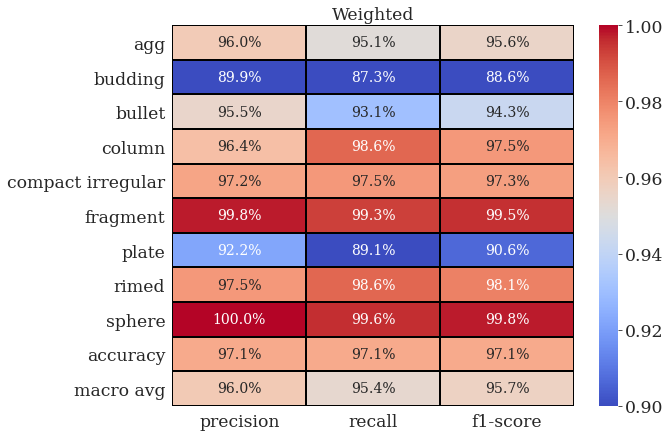

In [49]:
clf_report = pd.read_csv(
    "/data/data/saved_accuracies/v1.3.0/save_val_metrics_e20_bs64_k0_1_unbalanced_v1.3.0.csv",
    index_col=0,
).drop(columns=["model", "fold"])
save_name = "/data/data/plots/unweighted_classification_report.pdf"


cocpit.plotting_scripts.plot_metrics.classification_report_classes(
    clf_report, save_name=save_name, save_fig=False
)  # should be lower

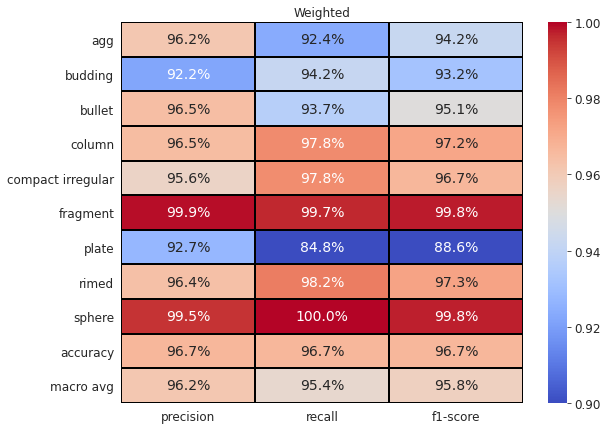

In [10]:
clf_report = pd.read_csv(
    "/data/data/saved_accuracies/v1.3.0/save_val_metrics_e20_bs64_k0_1_balanced_v1.3.0.csv",
    index_col=0,
).drop(columns=["model", "fold"])
save_name = "/data/data/plots/weighted_classification_report.pdf"


cocpit.plotting_scripts.plot_metrics.classification_report_classes(
    clf_report, save_name=save_name, save_fig=False
)